In [5]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("dark")

In [6]:
with open("5-seconds-2D-dynamic.json") as json_data:
    five_seconds = json.load(json_data)
    json_data.close()

In [7]:
with open("2d-different-time-srrt-edge.json") as json_data:
    different_time = json.load(json_data)
    json_data.close()

In [8]:
five_seconds[0].keys()

dict_keys(['Algorithm', 'Map Names', 'Results', 'Success Rate'])

In [9]:
def report(algo_data):
    output = ""
    output += f"Name: {algo_data['Algorithm']}\n"
    output += f"Success Rate: {algo_data['Success Rate']}"
    
    return output

In [10]:
summary = report(five_seconds[2])
print(summary)

Name: MB-SRRT-Edge-5
Success Rate: 0.64


Fix D* Lite Success Rate

In [11]:
d_star = five_seconds[0]
d_star_results = d_star["Results"]

empty_paths = sum(1 for d in d_star_results if d.get("path") == [])

real_success_rate = 1 - (empty_paths / len(d_star_results))
real_success_rate

0.0485714285714286

# Dynamic 2D 

In [12]:

df_list = []

for entry in five_seconds:
    algorithm_name = entry["Algorithm"]
    map_names = entry["Map Names"]
    results = entry["Results"]
    
    df = pd.DataFrame(results)
    
    df["map_name"] = map_names
    
    df.set_index("map_name", inplace=True)

    df.columns = [f"{algorithm_name}_{col}" for col in df.columns]
    
    df_list.append(df)

final_df = pd.concat(df_list, axis=1)

final_df

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
house_18,[],0.0,0.0,5.002749,2.861023e-06,"[66.4, 92.0, 92.0, 92.3, 92.9, 85.7, 77.8, 82....",193479,[],None,NaN,...,234153,[],None,NaN,NaN,5.007817,NaN,"[100.0, 100.0, 100.0, 0.0, 100.0, 100.0, 100.0...",189295,[]
block_70,[],0.0,0.0,5.002370,1.668930e-06,"[20.8, 87.5, 94.7, 85.7, 100.0, 100.0, 100.0, ...",447055,[],None,NaN,...,250071,[],"[[333, 381], [340, 379], [345.6920997883031, 3...",660.721688,416438.097768,4.229084,7.739738,"[14.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",4739155,[]
block_41,[],0.0,0.0,5.000662,9.536743e-07,"[82.2, 89.2, 89.5, 90.2, 87.5, 88.9, 83.3, 75....",334690,[],None,NaN,...,83151,[],None,NaN,NaN,0.009193,NaN,[27.1],46991,[]
house_14,[],0.0,0.0,5.000562,1.430511e-06,"[84.6, 90.9, 58.3, 65.2, 73.7, 74.2, 75.9, 69....",348127,[],"[[871.0245267469691, 14.353306712541116], [866...",241.628762,...,183223,[],"[[876, 11], [875, 11], [870.3365307757551, 14....",258.830405,156267.781670,0.394505,3.218573,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4456801,[]
house_75,[],0.0,0.0,5.000056,1.192093e-06,"[2.0, 10.7, 6.3, 7.4, 100.0, 100.0, 100.0, 100...",572890,[],None,NaN,...,215913,[],None,NaN,NaN,5.008830,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",223511,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
house_76,[],0.0,0.0,5.001570,1.192093e-06,"[27.8, 10.7, 64.0, 55.6, 31.6, 62.5, 70.3, 80....",411651,[],None,NaN,...,152421,[],None,NaN,NaN,5.017114,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",140304,[]
house_47,[],0.0,0.0,5.002060,9.536743e-07,"[82.9, 86.2, 86.1, 80.0, 78.1, 70.7, 59.3, 56....",416728,[],"[[249.48909324508102, 735.0190400859883], [253...",465.779210,...,119048,[],"[[245, 739], [248, 737], [253.2673734374863, 7...",392.677945,249088.555069,2.930509,4.868082,"[100.0, 100.0, 83.3, 100.0, 100.0, 100.0, 100....",4626372,[]
block_82,[],0.0,0.0,0.104908,2.582743e-01,"[35.1, 33.7]",42518,[],None,NaN,...,250616,[],None,NaN,NaN,5.000471,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",191264,[]


## SRRT-Edge

### Where did it fail? 

In [13]:
check_col = "MB-SRRT-Edge-5_path"

filtered_df = final_df[final_df[check_col].isna()]

rrt_star_path = "Informed RRT*_path"
rrt_edge_path = "RRT-Edge: 5_path"

filtered_df

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_41,[],0.0,0.0,5.000662,9.536743e-07,"[82.2, 89.2, 89.5, 90.2, 87.5, 88.9, 83.3, 75....",334690,[],None,NaN,...,83151,[],None,NaN,NaN,0.009193,NaN,[27.1],46991,[]
house_75,[],0.0,0.0,5.000056,1.192093e-06,"[2.0, 10.7, 6.3, 7.4, 100.0, 100.0, 100.0, 100...",572890,[],None,NaN,...,215913,[],None,NaN,NaN,5.008830,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",223511,[]
block_210,[],0.0,0.0,5.002041,9.536743e-07,"[55.6, 56.8, 57.1, 58.1, 57.8, 59.1, 57.1, 59....",512063,[],"[[94.56646566959702, 331.239298986111], [100.1...",956.91257,...,236815,[],None,NaN,NaN,5.009978,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",199159,[]
house_64,[],0.0,0.0,5.000790,1.430511e-06,"[66.7, 60.5, 57.5, 32.0, 56.2, 51.4, 59.5, 60....",460919,[],None,NaN,...,100239,[],None,NaN,NaN,5.000920,NaN,"[100.0, 100.0, 100.0, 100.0, 40.0, 100.0, 100....",145559,[]
block_172,[],0.0,0.0,5.008086,7.152557e-06,"[75.4, 77.8, 60.0, 63.6, 58.3, 64.3, 54.8, 67....",397455,[],None,NaN,...,212588,[],None,NaN,NaN,5.007324,NaN,"[85.7, 78.3, 87.5, 100.0, 100.0, 100.0, 100.0,...",185080,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
block_48,[],0.0,0.0,0.000380,1.192093e-06,[52.8],48830,[],None,NaN,...,145488,[],None,NaN,NaN,5.003073,NaN,"[87.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",118120,[]
block_72,[],0.0,0.0,5.000583,1.192093e-06,"[66.7, 55.6, 46.7, 63.3, 40.9, 18.5, 20.9, 52....",365545,[],None,NaN,...,74884,[],None,NaN,NaN,0.027834,NaN,[75.9],47392,[]
house_76,[],0.0,0.0,5.001570,1.192093e-06,"[27.8, 10.7, 64.0, 55.6, 31.6, 62.5, 70.3, 80....",411651,[],None,NaN,...,152421,[],None,NaN,NaN,5.017114,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",140304,[]


In [14]:
# Where other algos found it
rrt_star_path = "Informed RRT*_path"
rrt_edge_path = "RRT-Edge_path"

non_nan_rrt_edge = filtered_df[rrt_edge_path].notna().sum()
non_nan_informed = filtered_df[rrt_star_path].notna().sum()

total_count = filtered_df.shape[0]

edge_percent = (non_nan_rrt_edge / total_count)
informed_percent = (non_nan_informed / total_count)

print(f"Edge percent: {edge_percent} informed percent: {informed_percent}")

Edge percent: 0.14285714285714285 informed percent: 0.023809523809523808


How many failed which had replanning?

In [15]:
def is_non_empty_list(x):
    return isinstance(x, list) and len(x) > 0

srrt_replanning = "MB-SRRT-Edge-5_replan_time"

count_non_empty_lists = filtered_df[srrt_replanning].apply(is_non_empty_list).sum()
count_non_empty_lists

0

### SRRT-Edge vs RRT-Edge

In [16]:
filtered_srrt_edge = final_df.dropna(subset=["MB-SRRT-Edge-5_path", "RRT-Edge_path"])
filtered_srrt_edge

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
house_18,[],0.0,0.0,5.002749,2.861023e-06,"[66.4, 92.0, 92.0, 92.3, 92.9, 85.7, 77.8, 82....",193479,[],None,NaN,...,234153,[],None,NaN,NaN,5.007817,NaN,"[100.0, 100.0, 100.0, 0.0, 100.0, 100.0, 100.0...",189295,[]
block_70,[],0.0,0.0,5.002370,1.668930e-06,"[20.8, 87.5, 94.7, 85.7, 100.0, 100.0, 100.0, ...",447055,[],None,NaN,...,250071,[],"[[333, 381], [340, 379], [345.6920997883031, 3...",660.721688,416438.097768,4.229084,7.739738,"[14.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",4739155,[]
house_14,[],0.0,0.0,5.000562,1.430511e-06,"[84.6, 90.9, 58.3, 65.2, 73.7, 74.2, 75.9, 69....",348127,[],"[[871.0245267469691, 14.353306712541116], [866...",241.628762,...,183223,[],"[[876, 11], [875, 11], [870.3365307757551, 14....",258.830405,156267.781670,0.394505,3.218573,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4456801,[]
house_10,[],0.0,0.0,5.003273,7.152557e-06,"[10.5, 100.0, 95.2, 89.5, 94.4, 68.2, 11.8, 37...",474639,[],None,NaN,...,147500,[],None,NaN,NaN,5.023651,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",145231,[]
block_113,[],0.0,0.0,5.003680,1.430511e-06,"[82.1, 74.2, 54.3, 63.9, 65.8, 62.5, 66.7, 81....",286751,[],"[[47.468104044682036, 375.1038531133901], [50....",258.697941,...,178439,[],"[[44, 380], [46, 377], [47.43411428273443, 371...",275.056946,166793.503688,0.160958,3.035791,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4463357,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
block_224,[],0.0,0.0,5.000757,7.731915e-04,"[15.4, 63.2, 41.7, 42.1, 45.5, 18.2, 63.0, 71....",349049,[],None,NaN,...,196084,[],None,NaN,NaN,5.000928,NaN,"[100.0, 100.0, 80.0, 87.5, 100.0, 100.0, 100.0...",164648,[]
block_136,[],0.0,0.0,5.001536,9.536743e-07,"[69.0, 60.0, 67.5, 62.5, 63.4, 75.6, 85.0, 76....",278896,[],"[[920.7379306301272, 412.25721347037296], [921...",475.158544,...,180139,[],"[[919, 418], [917, 417], [912.7573593128807, 4...",426.706442,253493.841409,4.244158,5.970500,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4813157,[1.0932996273040771]
block_233,[],0.0,0.0,5.001129,4.768372e-07,"[12.8, 15.0, 17.1, 22.7, 20.5, 24.4, 20.0, 13....",631928,[],"[[184.38450649059817, 413.98766688775254], [18...",467.831499,...,252664,[],"[[184, 408], [183, 413], [183.98639392383214, ...",460.382231,284495.038180,0.594866,5.910294,"[85.7, 4.8, 100.0, 100.0, 37.5, 100.0, 100.0, ...",4572019,[]


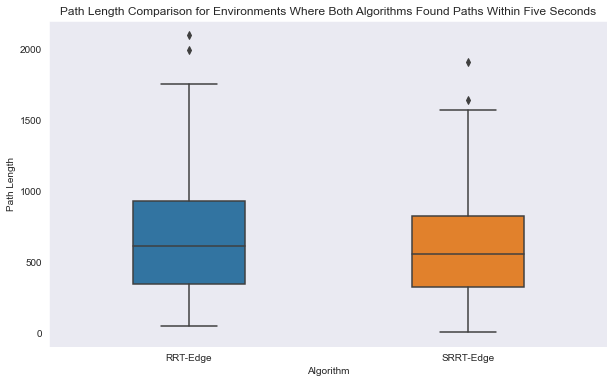

In [17]:
rrt_edge_paths = filtered_srrt_edge["RRT-Edge_path_len"]
srrt_edge_path = filtered_srrt_edge["MB-SRRT-Edge-5_path_len"]

data = pd.DataFrame(
    {
        "Path Length": pd.concat([rrt_edge_paths, srrt_edge_path]),
        "Algorithm": ["RRT-Edge"] * len(rrt_edge_paths)
        + ["SRRT-Edge"] * len(srrt_edge_path),
    }
)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Algorithm", y="Path Length", data=data, width=0.4)
plt.title(
    "Path Length Comparison for Environments Where Both Algorithms Found Paths Within Five Seconds"
)
plt.show()

Memory Usage

In [18]:
rrt_edge_memory = final_df["RRT-Edge_memory_used"]
srrt_edge_memory = final_df["MB-SRRT-Edge-5_memory_used"]
d_star_memory = final_df["D* Lite: 5_memory_used"]

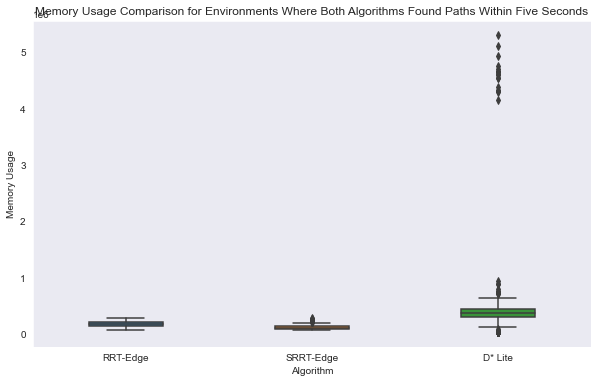

In [19]:
data = pd.DataFrame(
    {
        "Memory Usage": pd.concat([rrt_edge_memory, srrt_edge_memory, d_star_memory]),
        "Algorithm": ["RRT-Edge"] * len(rrt_edge_memory)
        + ["SRRT-Edge"] * len(rrt_edge_memory) + ["D* Lite"] * len(rrt_edge_memory),
    }
)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Algorithm", y="Memory Usage", data=data, width=0.4)
plt.title(
    "Memory Usage Comparison for Environments Where Both Algorithms Found Paths Within Five Seconds"
)
plt.show()

In [20]:
d_star_range = d_star_memory.max() - d_star_memory.min()
print(d_star_range)

5249563


In [21]:
rrt_edge_range = rrt_edge_memory.max() - rrt_edge_memory.min()
print(rrt_edge_range)

216212


In [22]:
srrt_edge_range = srrt_edge_memory.max() - srrt_edge_memory.min()
print(srrt_edge_range)

209344


In [23]:
srrt_edge_memory.median()

118378.0

In [24]:
rrt_edge_memory.median()

191662.5

### Different Times

In [25]:
df_list = []

for entry in different_time:
    algorithm_name = entry["Algorithm"]
    map_names = entry["Map Names"]
    results = entry["Results"]
    
    df = pd.DataFrame(results)
    
    df["map_name"] = map_names
    
    df.set_index("map_name", inplace=True)

    df.columns = [f"{algorithm_name}_{col}" for col in df.columns]
    
    df_list.append(df)

final_df_different = pd.concat(df_list, axis=1)

final_df_different

,MB-SRRT-Edge-1_path,MB-SRRT-Edge-1_path_len,MB-SRRT-Edge-1_energy,MB-SRRT-Edge-1_compute_time,MB-SRRT-Edge-1_traversal_time,MB-SRRT-Edge-1_cpu_usage,MB-SRRT-Edge-1_memory_used,MB-SRRT-Edge-1_replan_time,MB-SRRT-Edge-2_path,MB-SRRT-Edge-2_path_len,...,MB-SRRT-Edge-3_memory_used,MB-SRRT-Edge-3_replan_time,MB-SRRT-Edge-4_path,MB-SRRT-Edge-4_path_len,MB-SRRT-Edge-4_energy,MB-SRRT-Edge-4_compute_time,MB-SRRT-Edge-4_traversal_time,MB-SRRT-Edge-4_cpu_usage,MB-SRRT-Edge-4_memory_used,MB-SRRT-Edge-4_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
house_18,None,NaN,NaN,1.005496,0.000289,"[59.5, 92.9, 100.0, 87.5, 100.0, 100.0, 90.0, ...",106160,[],None,NaN,...,110465,[],"[[918, 408], [914.7923113556419, 413.070575269...",1151.064913,680640.841687,4.002360,1.753649,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",126223,[]
block_70,"[[333, 381], [338.9962985190957, 381.210722732...",600.784230,352826.361950,1.057434,1.258470,"[81.0, 85.7, 100.0, 90.0, 57.1, 25.6, 100.0, 1...",96871,[],"[[333, 381], [338.9962985190957, 381.210722732...",600.784230,...,118135,[],"[[333, 381], [338.9962985190957, 381.210722732...",600.784230,352826.361950,4.080784,1.362139,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",134778,[]
block_41,None,NaN,NaN,1.000417,0.000300,"[61.5, 100.0, 88.9, 100.0, 100.0, 88.9, 25.0]",91035,[],None,NaN,...,91143,[],None,NaN,NaN,4.000363,0.000434,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",91945,[]
house_14,"[[876, 11], [872.3793439788868, 15.78443831361...",232.002155,136010.167714,1.028491,0.849582,"[59.5, 92.9, 100.0, 87.5, 100.0, 100.0, 88.9, ...",77514,[],"[[876, 11], [872.3793439788868, 15.78443831361...",232.002155,...,95247,[],"[[876, 11], [872.3793439788868, 15.78443831361...",232.002155,136010.167714,4.003026,1.089912,"[100.0, 100.0, 100.0, 100.0, 100.0, 87.5, 100....",109095,[]
house_75,None,NaN,NaN,1.003929,0.000462,"[100.0, 100.0, 100.0, 100.0, 38.1, 100.0, 87.5...",97235,[],"[[842, 880], [843.5888970796651, 874.214206530...",1216.702897,...,134279,[],"[[842, 880], [836.1602467372194, 878.622581461...",1527.358742,894732.943221,4.002195,2.378746,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",154654,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
house_76,None,NaN,NaN,1.004325,0.000433,"[21.1, 85.7, 87.5, 100.0, 100.0, 100.0]",91196,[],None,NaN,...,104480,[],None,NaN,NaN,4.003092,0.000376,"[100.0, 83.3, 87.5, 100.0, 100.0, 100.0, 100.0...",117066,[]
house_47,"[[245, 739], [247.62524771893388, 733.60481006...",393.620311,230340.022867,1.004901,1.162241,"[100.0, 100.0, 100.0, 100.0, 75.0, 100.0, 100....",75798,[],"[[245, 739], [248.8930834509415, 734.434487844...",382.357204,...,100552,[],"[[245, 739], [249.4490145537203, 734.974298880...",389.137575,229810.745172,4.090288,0.923759,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",98085,[]
block_82,None,NaN,NaN,1.009018,0.000240,"[100.0, 100.0, 80.0, 100.0, 100.0, 100.0, 100....",93210,[],None,NaN,...,184504,[],None,NaN,NaN,4.008076,0.000244,"[100.0, 100.0, 100.0, 87.5, 100.0, 100.0, 100....",197533,[]


In [26]:
success_1 = different_time[0]["Success Rate"]
success_2 = different_time[1]["Success Rate"]
success_3 = different_time[2]["Success Rate"]
success_4 = different_time[3]["Success Rate"]

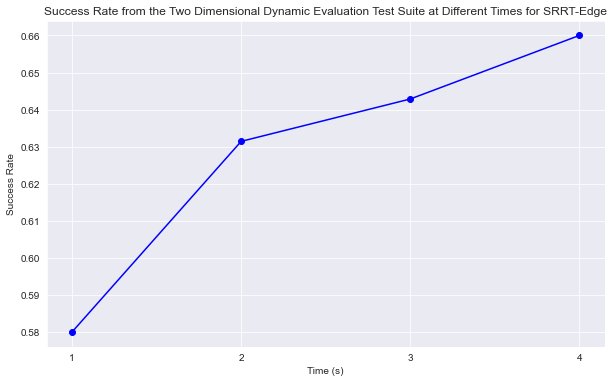

In [27]:
keys = ["1", "2", "3", "4"]
success_rates = [success_1, success_2, success_3, success_4]

plt.figure(figsize=(10, 6))
plt.plot(keys, success_rates, marker='o', linestyle='-', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Success Rate')
plt.title('Success Rate from the Two Dimensional Dynamic Evaluation Test Suite at Different Times for SRRT-Edge')
plt.grid(True)
plt.show()

# AD A*

In [28]:
five_seconds[4]

{'Algorithm': 'Adaptive A*: 5',
 'Map Names': ['house_18',
  'block_70',
  'block_41',
  'house_14',
  'house_75',
  'house_10',
  'block_113',
  'block_21',
  'block_40',
  'block_147',
  'block_43',
  'block_178',
  'block_124',
  'house_50',
  'block_245',
  'block_210',
  'house_64',
  'block_230',
  'block_172',
  'block_58',
  'house_25',
  'block_8',
  'block_22',
  'block_63',
  'block_23',
  'block_75',
  'house_74',
  'block_28',
  'block_142',
  'block_119',
  'house_40',
  'block_201',
  'block_127',
  'block_222',
  'block_31',
  'house_13',
  'block_164',
  'block_95',
  'block_129',
  'block_9',
  'block_18',
  'block_109',
  'block_87',
  'block_153',
  'block_33',
  'block_218',
  'house_41',
  'block_45',
  'house_88',
  'block_152',
  'block_163',
  'block_91',
  'block_165',
  'block_79',
  'block_108',
  'block_5',
  'block_1',
  'block_120',
  'block_196',
  'block_101',
  'block_151',
  'block_76',
  'house_15',
  'block_46',
  'house_85',
  'block_116',
  'block

In [29]:
five_seconds[0]

{'Algorithm': 'D* Lite: 5',
 'Map Names': ['house_18',
  'block_70',
  'block_41',
  'house_14',
  'house_75',
  'house_10',
  'block_113',
  'block_21',
  'block_40',
  'block_147',
  'block_43',
  'block_178',
  'block_124',
  'house_50',
  'block_245',
  'block_210',
  'house_64',
  'block_230',
  'block_172',
  'block_58',
  'house_25',
  'block_8',
  'block_22',
  'block_63',
  'block_23',
  'block_75',
  'house_74',
  'block_28',
  'block_142',
  'block_119',
  'house_40',
  'block_201',
  'block_127',
  'block_222',
  'block_31',
  'house_13',
  'block_164',
  'block_95',
  'block_129',
  'block_9',
  'block_18',
  'block_109',
  'block_87',
  'block_153',
  'block_33',
  'block_218',
  'house_41',
  'block_45',
  'house_88',
  'block_152',
  'block_163',
  'block_91',
  'block_165',
  'block_79',
  'block_108',
  'block_5',
  'block_1',
  'block_120',
  'block_196',
  'block_101',
  'block_151',
  'block_76',
  'house_15',
  'block_46',
  'house_85',
  'block_116',
  'block_4',

In [30]:
d_star_memory.median()

382492.0

In [31]:
ad_astar_memory = final_df["Adaptive A*: 5_memory_used"]
ad_astar_memory.median()

198451.5

Maps in which both D* and AD A* found a solution

In [32]:
df_list = []

for entry in five_seconds:
    algorithm_name = entry["Algorithm"]
    map_names = entry["Map Names"]
    results = entry["Results"]
    
    df = pd.DataFrame(results)
    
    df["map_name"] = map_names
    
    df.set_index("map_name", inplace=True)

    df.columns = [f"{algorithm_name}_{col}" for col in df.columns]
    
    df_list.append(df)

final_df = pd.concat(df_list, axis=1)

final_df

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
house_18,[],0.0,0.0,5.002749,2.861023e-06,"[66.4, 92.0, 92.0, 92.3, 92.9, 85.7, 77.8, 82....",193479,[],None,NaN,...,234153,[],None,NaN,NaN,5.007817,NaN,"[100.0, 100.0, 100.0, 0.0, 100.0, 100.0, 100.0...",189295,[]
block_70,[],0.0,0.0,5.002370,1.668930e-06,"[20.8, 87.5, 94.7, 85.7, 100.0, 100.0, 100.0, ...",447055,[],None,NaN,...,250071,[],"[[333, 381], [340, 379], [345.6920997883031, 3...",660.721688,416438.097768,4.229084,7.739738,"[14.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",4739155,[]
block_41,[],0.0,0.0,5.000662,9.536743e-07,"[82.2, 89.2, 89.5, 90.2, 87.5, 88.9, 83.3, 75....",334690,[],None,NaN,...,83151,[],None,NaN,NaN,0.009193,NaN,[27.1],46991,[]
house_14,[],0.0,0.0,5.000562,1.430511e-06,"[84.6, 90.9, 58.3, 65.2, 73.7, 74.2, 75.9, 69....",348127,[],"[[871.0245267469691, 14.353306712541116], [866...",241.628762,...,183223,[],"[[876, 11], [875, 11], [870.3365307757551, 14....",258.830405,156267.781670,0.394505,3.218573,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4456801,[]
house_75,[],0.0,0.0,5.000056,1.192093e-06,"[2.0, 10.7, 6.3, 7.4, 100.0, 100.0, 100.0, 100...",572890,[],None,NaN,...,215913,[],None,NaN,NaN,5.008830,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",223511,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
house_76,[],0.0,0.0,5.001570,1.192093e-06,"[27.8, 10.7, 64.0, 55.6, 31.6, 62.5, 70.3, 80....",411651,[],None,NaN,...,152421,[],None,NaN,NaN,5.017114,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",140304,[]
house_47,[],0.0,0.0,5.002060,9.536743e-07,"[82.9, 86.2, 86.1, 80.0, 78.1, 70.7, 59.3, 56....",416728,[],"[[249.48909324508102, 735.0190400859883], [253...",465.779210,...,119048,[],"[[245, 739], [248, 737], [253.2673734374863, 7...",392.677945,249088.555069,2.930509,4.868082,"[100.0, 100.0, 83.3, 100.0, 100.0, 100.0, 100....",4626372,[]
block_82,[],0.0,0.0,0.104908,2.582743e-01,"[35.1, 33.7]",42518,[],None,NaN,...,250616,[],None,NaN,NaN,5.000471,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",191264,[]


In [33]:
final_df["D* Lite: 5_path"] = final_df["D* Lite: 5_path"].apply(lambda x: None if x == [] else x)
filtered_srrt_edge = final_df.dropna(subset=["Adaptive A*: 5_path", "D* Lite: 5_path"])

In [34]:
d_star_path_len = filtered_srrt_edge["D* Lite: 5_path_len"]
adaptive_a_star_len = filtered_srrt_edge["Adaptive A*: 5_path_len"]

In [35]:
d_star_path_len.median()

125.89696907282743

In [36]:
d_star_path_len.mean()

148.014161953167

In [37]:
adaptive_a_star_len.median()

130.7586984815491

In [38]:
adaptive_a_star_len.mean()

160.19946514268918

In [39]:
filtered_srrt_edge = final_df.dropna(subset=["Adaptive A*: 5_path", "RRT-Edge_path"])
filtered_srrt_edge

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_70,None,0.0,0.0,5.002370,1.668930e-06,"[20.8, 87.5, 94.7, 85.7, 100.0, 100.0, 100.0, ...",447055,[],None,NaN,...,250071,[],"[[333, 381], [340, 379], [345.6920997883031, 3...",660.721688,416438.097768,4.229084,7.739738,"[14.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",4739155,[]
house_14,None,0.0,0.0,5.000562,1.430511e-06,"[84.6, 90.9, 58.3, 65.2, 73.7, 74.2, 75.9, 69....",348127,[],"[[871.0245267469691, 14.353306712541116], [866...",241.628762,...,183223,[],"[[876, 11], [875, 11], [870.3365307757551, 14....",258.830405,156267.781670,0.394505,3.218573,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4456801,[]
block_113,None,0.0,0.0,5.003680,1.430511e-06,"[82.1, 74.2, 54.3, 63.9, 65.8, 62.5, 66.7, 81....",286751,[],"[[47.468104044682036, 375.1038531133901], [50....",258.697941,...,178439,[],"[[44, 380], [46, 377], [47.43411428273443, 371...",275.056946,166793.503688,0.160958,3.035791,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4463357,[]
block_124,None,0.0,0.0,5.001375,6.520748e-04,"[66.7, 85.7, 83.3, 63.6, 71.8, 50.0, 66.7, 88....",452269,[],"[[627.0483020484836, 644.3604558058139], [629....",500.587616,...,207791,[],"[[625, 650], [629, 645], [630.897366596101, 63...",486.021269,285120.325625,0.171743,9.454931,"[87.5, 100.0, 100.0, 76.2, 85.7, 100.0, 100.0,...",4686610,"[0.2754495143890381, 1.2718863487243652, 1.249..."
block_245,None,0.0,0.0,5.002460,9.536743e-07,"[89.7, 85.7, 65.8, 72.2, 90.5, 67.4, 65.9, 82....",204538,[],"[[370.64220173131594, 563.7007402155865], [367...",162.192396,...,183657,[],"[[376, 561], [375, 561], [369.0007557150984, 5...",138.035743,83297.869666,0.079050,1.469895,"[100.0, 63.9, 80.0, 100.0, 100.0, 100.0, 100.0...",4444744,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
house_24,None,0.0,0.0,5.001292,9.536743e-07,"[74.1, 37.8, 50.0, 70.0, 53.5, 56.8, 68.3, 70....",333537,[],"[[886.186404711893, 784.5160492507835], [880.3...",337.677174,...,162480,[],"[[892, 786], [893, 784], [892.337410843551, 77...",376.172312,235857.016219,0.505129,4.810920,"[100.0, 100.0, 100.0, 100.0, 93.7, 100.0, 100....",4535711,[]
house_17,None,0.0,0.0,5.001283,9.536743e-07,"[59.1, 60.0, 52.6, 56.8, 37.8, 63.9, 39.0, 59....",334240,[],"[[693.2052269213493, 44.72527637727219], [691....",214.499325,...,178125,[],"[[695, 39], [692, 44], [694.0504583785203, 49....",229.741692,141904.893776,0.471620,2.671922,"[100.0, 100.0, 87.5, 100.0, 100.0, 100.0, 88.9...",4452387,[]
block_136,None,0.0,0.0,5.001536,9.536743e-07,"[69.0, 60.0, 67.5, 62.5, 63.4, 75.6, 85.0, 76....",278896,[],"[[920.7379306301272, 412.25721347037296], [921...",475.158544,...,180139,[],"[[919, 418], [917, 417], [912.7573593128807, 4...",426.706442,253493.841409,4.244158,5.970500,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4813157,[1.0932996273040771]


In [40]:
adastar_len = filtered_srrt_edge["Adaptive A*: 5_path_len"]
rrt_edge_len = filtered_srrt_edge["RRT-Edge_path_len"]

print(rrt_edge_len.mean())

422.37655408300475


In [41]:
rrt_edge_len.mean()

422.37655408300475

Where does it fail?

In [42]:
filtered_fail = final_df[final_df["Adaptive A*: 5_path"].isna()]
filtered_fail

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
house_18,None,0.0,0.0,5.002749,2.861023e-06,"[66.4, 92.0, 92.0, 92.3, 92.9, 85.7, 77.8, 82....",193479,[],None,NaN,...,234153,[],None,NaN,NaN,5.007817,NaN,"[100.0, 100.0, 100.0, 0.0, 100.0, 100.0, 100.0...",189295,[]
block_41,None,0.0,0.0,5.000662,9.536743e-07,"[82.2, 89.2, 89.5, 90.2, 87.5, 88.9, 83.3, 75....",334690,[],None,NaN,...,83151,[],None,NaN,NaN,0.009193,NaN,[27.1],46991,[]
house_75,None,0.0,0.0,5.000056,1.192093e-06,"[2.0, 10.7, 6.3, 7.4, 100.0, 100.0, 100.0, 100...",572890,[],None,NaN,...,215913,[],None,NaN,NaN,5.008830,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",223511,[]
house_10,None,0.0,0.0,5.003273,7.152557e-06,"[10.5, 100.0, 95.2, 89.5, 94.4, 68.2, 11.8, 37...",474639,[],None,NaN,...,147500,[],None,NaN,NaN,5.023651,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",145231,[]
block_21,None,0.0,0.0,5.000635,1.382828e-05,"[44.4, 40.9, 39.5, 43.9, 41.9, 42.9, 48.8, 43....",549991,[],"[[872.1899861093495, 684.635061396902], [869.6...",920.361105,...,174763,[],None,NaN,NaN,5.009555,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 18.9, 5.0,...",150311,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
block_72,None,0.0,0.0,5.000583,1.192093e-06,"[66.7, 55.6, 46.7, 63.3, 40.9, 18.5, 20.9, 52....",365545,[],None,NaN,...,74884,[],None,NaN,NaN,0.027834,NaN,[75.9],47392,[]
house_76,None,0.0,0.0,5.001570,1.192093e-06,"[27.8, 10.7, 64.0, 55.6, 31.6, 62.5, 70.3, 80....",411651,[],None,NaN,...,152421,[],None,NaN,NaN,5.017114,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",140304,[]
block_82,None,0.0,0.0,0.104908,2.582743e-01,"[35.1, 33.7]",42518,[],None,NaN,...,250616,[],None,NaN,NaN,5.000471,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",191264,[]


In [43]:
filtered_fail = filtered_fail[filtered_fail["Adaptive A*: 5_traversal_time"].notna()]
filtered_fail

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
block_40,None,0.0,0.0,5.007637,1.668930e-06,"[100.0, 23.1, 12.9, 11.1, 66.7, 84.0, 90.5, 90...",407671,[],"[[934.4888103002279, 145.80657435079434], [932...",243.102775,...,182516,[],None,NaN,NaN,4.930801,0.128675,"[7.0, 100.0, 100.0, 100.0, 83.3, 3.4, 100.0, 9...",4445106,[0.08083367347717285]
block_63,None,0.0,0.0,5.082953,2.384186e-06,"[66.7, 68.2, 76.9, 78.8, 77.8, 78.0, 83.3, 85....",340335,[],"[[627.0229199639283, 882.0000437772219], [627....",853.759658,...,200087,[],None,NaN,NaN,1.282273,9.578071,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 50....",4786943,[5.095580339431763]
block_119,None,0.0,0.0,5.001445,1.668930e-05,"[57.9, 62.5, 58.5, 61.5, 62.2, 62.5, 61.9, 61....",319017,[],"[[292.589195398646, 38.831777634375165], [291....",487.104113,...,204216,[],None,NaN,NaN,0.242797,6.706319,"[2.4, 100.0, 100.0, 100.0, 100.0, 100.0, 85.7,...",4842112,"[0.5143537521362305, 0.9460153579711914, 0.834..."
block_196,None,0.0,0.0,5.036074,1.430511e-06,"[39.3, 30.4, 73.1, 77.1, 73.2, 60.5, 75.0, 80....",434432,[],"[[455.69684819856553, 17.181253947539116], [45...",937.178648,...,195656,[],None,NaN,NaN,4.636958,6.925985,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4859760,"[0.3261754512786865, 0.04333615303039551]"
block_11,None,0.0,0.0,5.000057,1.192093e-06,"[91.3, 92.9, 100.0, 90.9, 78.6, 77.8, 27.0, 26...",395187,[],"[[436.0895373857566, 126.96731820698191], [432...",553.784641,...,240288,[],None,NaN,NaN,0.302248,4.840682,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4637392,"[0.9808390140533447, 1.0612330436706543, 0.305..."
block_225,None,0.0,0.0,5.001598,9.536743e-07,"[56.1, 67.6, 62.5, 65.8, 74.4, 71.8, 68.7, 73....",363448,[],"[[549.5747223690446, 18.789667474080918], [550...",853.771293,...,244280,[],None,NaN,NaN,0.253623,4.246170,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4695898,"[0.6270086765289307, 0.036599159240722656]"
block_20,None,0.0,0.0,5.002580,1.430511e-06,"[9.1, 79.5, 74.4, 78.9, 75.6, 77.8, 70.7, 73.0...",487408,[],"[[924.0248146438265, 79.35373384032141], [919....",1027.751334,...,192717,[],None,NaN,NaN,1.811420,36.836327,"[27.9, 82.4, 91.7, 100.0, 100.0, 100.0, 100.0,...",4786511,"[1.6973998546600342, 1.7861270904541016, 1.733..."
block_19,None,0.0,0.0,5.001108,2.861023e-06,"[70.5, 55.6, 64.3, 68.7, 69.4, 59.4, 50.0, 54....",340304,[],"[[519.9211318418766, 497.09779333660816], [519...",643.401319,...,251603,[],None,NaN,NaN,1.682924,6.914252,"[100.0, 93.8, 100.0, 100.0, 100.0, 90.9, 100.0...",4766432,"[1.2976536750793457, 0.4990253448486328, 0.403..."
block_213,None,0.0,0.0,5.000549,1.192093e-06,"[20.2, 4.3, 54.3, 18.8, 25.0, 35.7, 76.9, 88.2...",588560,[],"[[547.2706172291887, 370.7001812889267], [543....",890.520678,...,223272,[],None,NaN,NaN,1.884211,5.634703,"[100.0, 87.5, 88.9, 54.5, 66.7, 100.0, 100.0, ...",4642921,"[1.9991142749786377, 2.2938356399536133, 0.037..."


# ENERGY

In [56]:
import sys
import os

os.chdir('../../')

# Update sys.path to include the sampling_based_planning directory
sys.path.append(os.path.join(os.getcwd(), 'Sampling_based_Planning'))

from rrt_2D.utils import Utils

In [54]:
final_df

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
house_18,None,0.0,0.0,5.002749,2.861023e-06,"[66.4, 92.0, 92.0, 92.3, 92.9, 85.7, 77.8, 82....",193479,[],None,NaN,...,234153,[],None,NaN,NaN,5.007817,NaN,"[100.0, 100.0, 100.0, 0.0, 100.0, 100.0, 100.0...",189295,[]
block_70,None,0.0,0.0,5.002370,1.668930e-06,"[20.8, 87.5, 94.7, 85.7, 100.0, 100.0, 100.0, ...",447055,[],None,NaN,...,250071,[],"[[333, 381], [340, 379], [345.6920997883031, 3...",660.721688,416438.097768,4.229084,7.739738,"[14.3, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",4739155,[]
block_41,None,0.0,0.0,5.000662,9.536743e-07,"[82.2, 89.2, 89.5, 90.2, 87.5, 88.9, 83.3, 75....",334690,[],None,NaN,...,83151,[],None,NaN,NaN,0.009193,NaN,[27.1],46991,[]
house_14,None,0.0,0.0,5.000562,1.430511e-06,"[84.6, 90.9, 58.3, 65.2, 73.7, 74.2, 75.9, 69....",348127,[],"[[871.0245267469691, 14.353306712541116], [866...",241.628762,...,183223,[],"[[876, 11], [875, 11], [870.3365307757551, 14....",258.830405,156267.781670,0.394505,3.218573,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",4456801,[]
house_75,None,0.0,0.0,5.000056,1.192093e-06,"[2.0, 10.7, 6.3, 7.4, 100.0, 100.0, 100.0, 100...",572890,[],None,NaN,...,215913,[],None,NaN,NaN,5.008830,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",223511,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
house_76,None,0.0,0.0,5.001570,1.192093e-06,"[27.8, 10.7, 64.0, 55.6, 31.6, 62.5, 70.3, 80....",411651,[],None,NaN,...,152421,[],None,NaN,NaN,5.017114,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",140304,[]
house_47,None,0.0,0.0,5.002060,9.536743e-07,"[82.9, 86.2, 86.1, 80.0, 78.1, 70.7, 59.3, 56....",416728,[],"[[249.48909324508102, 735.0190400859883], [253...",465.779210,...,119048,[],"[[245, 739], [248, 737], [253.2673734374863, 7...",392.677945,249088.555069,2.930509,4.868082,"[100.0, 100.0, 83.3, 100.0, 100.0, 100.0, 100....",4626372,[]
block_82,None,0.0,0.0,0.104908,2.582743e-01,"[35.1, 33.7]",42518,[],None,NaN,...,250616,[],None,NaN,NaN,5.000471,NaN,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",191264,[]


In [84]:
filtered = final_df.dropna(subset=["D* Lite: 5_path", "RRT-Edge_path", "MB-SRRT-Edge-5_path", "Adaptive A*: 5_path"])
filtered

,D* Lite: 5_path,D* Lite: 5_path_len,D* Lite: 5_energy,D* Lite: 5_compute_time,D* Lite: 5_traversal_time,D* Lite: 5_cpu_usage,D* Lite: 5_memory_used,D* Lite: 5_replan_time,Informed RRT*_path,Informed RRT*_path_len,...,RRT-Edge_memory_used,RRT-Edge_replan_time,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Adaptive A*: 5_replan_time
map_name,,,,,,,,,,,,,,,,,,,,,
house_40,"[[963, 745], [968, 740], [973, 735], [978, 730...",36.044155,20507.804117,1.163740,1.518858,"[66.7, 66.7, 67.4, 64.9, 66.7, 64.4, 67.4, 70....",4378791,[],None,NaN,...,221832,[],"[[958, 749], [965, 746], [970.692099788303, 74...",41.516197,24005.468771,0.164669,0.444444,"[85.7, 84.2, 100.0, 100.0, 54.5]",4289624,[]
block_110,"[[752, 246], [747, 251], [742, 256], [737, 261...",70.738630,38216.721526,1.519887,1.889090,"[72.5, 59.4, 66.7, 28.1, 86.2, 43.6, 60.4, 73....",4541299,[],"[[750.2257810639269, 242.63045873247202], [744...",85.662135,...,241013,[],"[[756, 241], [754, 246], [749.7573593128807, 2...",76.344957,48181.982298,0.054476,0.805562,"[9.5, 100.0, 100.0, 100.0, 100.0, 0.0]",4418439,[]
house_80,"[[869, 980], [869, 975], [869, 970], [869, 965...",33.000000,23702.327072,0.318067,1.376973,"[71.8, 75.7, 66.7, 67.4, 73.7, 67.4, 79.2, 76....",4326068,[],None,NaN,...,192488,[],"[[867, 985], [867.0, 979.0], [867, 977], [867....",38.308534,23860.166966,0.089932,0.427964,"[66.7, 100.0, 100.0, 100.0, 30.8]",4290972,[]
block_241,"[[235, 699], [230, 704], [225, 709], [220, 714]]",21.213203,10248.465440,0.097380,0.893014,"[58.3, 20.0, 33.3, 87.5, 17.2]",4284332,[],None,NaN,...,185392,[],"[[240, 694], [239, 700], [234.7573593128807, 7...",30.378607,16976.948405,0.133445,0.303907,"[100.0, 100.0, 100.0, 3.0]",4277071,[]
house_63,"[[40, 248], [45, 253], [50, 258], [55, 263], [...",161.220346,81139.041349,0.213215,2.478261,"[22.0, 14.6, 31.0, 34.1, 12.5, 3.4, 40.5, 41.9...",4540911,[],None,NaN,...,196312,[],"[[35, 243], [38, 248], [40.10674064953035, 253...",181.955368,110831.425988,0.242117,1.843878,"[5.3, 87.5, 100.0, 83.3, 100.0, 100.0, 100.0, ...",4443493,[]
block_175,"[[928, 26], [923, 26], [918, 26], [913, 26], [...",756.000000,524614.022985,3.424355,34.920106,"[69.6, 76.3, 74.4, 71.1, 71.1, 74.4, 71.8, 80....",5291483,[],"[[927.0000051802579, 25.00788435587351], [921....",755.000657,...,241152,[],"[[933, 25], [927, 28], [921.307900211697, 26.1...",788.480757,489903.368721,0.785735,9.570586,"[100.0, 100.0, 83.3, 100.0, 100.0, 100.0, 100....",4657933,[]
block_107,"[[344, 92], [349, 97], [354, 102], [359, 107],...",125.896969,66535.230098,4.059421,2.241024,"[63.6, 81.8, 86.4, 84.6, 91.7, 90.9, 78.6, 85....",4759047,[],"[[340.3067228189374, 92.99215496397942], [340....",187.637090,...,175680,[],"[[340, 87], [342, 92], [346.24264068711926, 96...",130.758698,86133.021571,0.293663,1.576456,"[50.0, 100.0, 83.3, 100.0, 100.0, 100.0, 100.0...",4449187,[]
block_249,"[[713, 990], [718, 985], [723, 980], [728, 978...",139.527300,92998.821019,4.508783,5.954594,"[52.3, 79.1, 65.9, 69.2, 75.8, 70.0, 30.4, 15....",4931507,[],"[[705.8419027892834, 988.4015523196963], [703....",187.640336,...,183208,[],"[[708, 994], [711, 994], [714.7481702853265, 9...",148.629103,99599.447404,0.238143,1.701841,"[100.0, 100.0, 88.9, 100.0, 100.0, 100.0, 83.3...",4444976,[]
block_73,"[[588, 831], [593, 826], [598, 821], [603, 816...",310.882820,158822.627427,2.636795,10.583623,"[62.5, 70.6, 75.0, 87.5, 55.6, 74.3, 76.5, 3.1...",5106874,[],"[[583.6741421745766, 830.037992592385], [584.3...",373.749213,...,223232,[],"[[583, 836], [585, 831], [585.597022314126, 82...",341.288109,208212.308271,0.987204,4.151236,"[85.7, 100.0, 100.0, 100.0, 100.0, 85.7, 100.0...",4553167,[]


In [90]:
filtered["D* Energy"] = filtered["D* Lite: 5_path"].apply(Utils.path_energy)
filtered["SRRT-Edge Energy"] = filtered["MB-SRRT-Edge-5_path"].apply(Utils.path_energy)
filtered["AD A* Energy"] = filtered["Adaptive A*: 5_path"].apply(Utils.path_energy)
filtered["RRT-Edge Energy"] = filtered["RRT-Edge_path"].apply(Utils.path_energy)
filtered["AD A* Energy"].median()

<ipython-input-90-3ad97571b037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["D* Energy"] = filtered["D* Lite: 5_path"].apply(Utils.path_energy)
<ipython-input-90-3ad97571b037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["SRRT-Edge Energy"] = filtered["MB-SRRT-Edge-5_path"].apply(Utils.path_energy)
<ipython-input-90-3ad97571b037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

38224.713344146854

In [89]:
filtered["D* Energy"].mean()

43497.10324046606

In [83]:
filtered["RRT-Edge Energy"] = filtered["RRT-Edge_path"].apply(Utils.path_energy)

<ipython-input-83-0af70808a686>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["RRT-Edge Energy"] = filtered["RRT-Edge_path"].apply(Utils.path_energy)
